In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append('/home/brash/python_modules')
from dark_mode import *
set_dark_mode(True)

# Library which will allow us to do simple linear regression
from scipy.stats import linregress

# Library which allows plotting of a world map
from mpl_toolkits.basemap import Basemap

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Input File (CSV)
input_data_file = "output_data/cities.csv"

In [16]:
# Read the previously created weather data from a file
clean_city_data = pd.read_csv(input_data_file)

In [17]:
clean_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2017 non-null   int64  
 1   City         2017 non-null   object 
 2   Latitude     2017 non-null   float64
 3   Longitude    2017 non-null   float64
 4   Max Temp     2017 non-null   float64
 5   Wind Speed   2017 non-null   float64
 6   Cloudiness   2017 non-null   float64
 7   Description  2017 non-null   object 
 8   Humidity     2017 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 141.9+ KB


In [18]:
# Cleaning of the data - first pass
#
# We need to remove any "duplicate entries" from the data, if we are going to generate a heatmap
# Problems arise if we have two cities that have exactly the same longitude.  To get around this, we
# can create a "fake" longitude, which is extremely close to the original longitude, but is just augmented
# slightly by the addition of a term proportional to the latitude.  This should result in different values of
# augmented longitude for each city in the dataframe.
clean_city_data['Augmented Longitude']=clean_city_data['Longitude']+0.0001*clean_city_data['Latitude']

# Sort the dataframe based upon this new augmented longitude.
clean_city_data.sort_values("Augmented Longitude", inplace = True)

# Drop any duplicate entries that might remain.  Note that in this example we went from 1321 entries in the 
# original dataframe to 1319 entries in the new dataframe.
clean_city_data.drop_duplicates(subset ="Augmented Longitude",keep = False, inplace = True)

clean_city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 81 to 713
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2015 non-null   int64  
 1   City                 2015 non-null   object 
 2   Latitude             2015 non-null   float64
 3   Longitude            2015 non-null   float64
 4   Max Temp             2015 non-null   float64
 5   Wind Speed           2015 non-null   float64
 6   Cloudiness           2015 non-null   float64
 7   Description          2015 non-null   object 
 8   Humidity             2015 non-null   float64
 9   Augmented Longitude  2015 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 173.2+ KB


In [31]:
# Cleaning of the data - second pass
#
# create a new dataframe, called parsed_data, which includes only those cities that have
# a) a temperature above 70F
# b) a temperature below 80F
# c) a wind speed < 10 mph
# d) a cloudiness = 0
#
parsed_data = clean_city_data[clean_city_data['Max Temp']>=(72-32.0)*5.0/9.0+273.15]
parsed_data = parsed_data[parsed_data['Max Temp']<=(82-32.0)*5.0/9.0+273.15]
parsed_data = parsed_data[parsed_data['Wind Speed']<=10]
parsed_data = parsed_data[parsed_data['Humidity']<=60]

parsed_data

,Unnamed: 0,City,Latitude,Longitude,Max Temp,Wind Speed,Cloudiness,Description,Humidity,Augmented Longitude
1366,1366,wahiawa,21.5028,-158.0236,299.82,7.20,1.0,clear sky,47.0,-158.021450
143,143,portland,45.5234,-122.6762,300.37,6.69,20.0,few clouds,29.0,-122.671648
1239,1239,auburn,47.3073,-122.2284,297.59,6.17,20.0,few clouds,33.0,-122.223669
1354,1354,williams lake,52.1415,-122.1445,297.04,2.57,75.0,broken clouds,34.0,-122.139286
1315,1315,butte,39.6499,-121.5677,298.15,1.54,1.0,clear sky,43.0,-121.563735
...,...,...,...,...,...,...,...,...,...,...
1401,1401,oyama,36.3000,139.8000,296.48,6.17,75.0,light rain,60.0,139.803630
450,450,hasaki,35.7333,140.8333,297.04,6.17,75.0,moderate rain,60.0,140.836873
1209,1209,mareeba,-17.0000,145.4333,300.37,7.72,40.0,scattered clouds,47.0,145.431600
1998,1998,cairns,-16.9167,145.7667,300.37,9.26,40.0,scattered clouds,57.0,145.765008


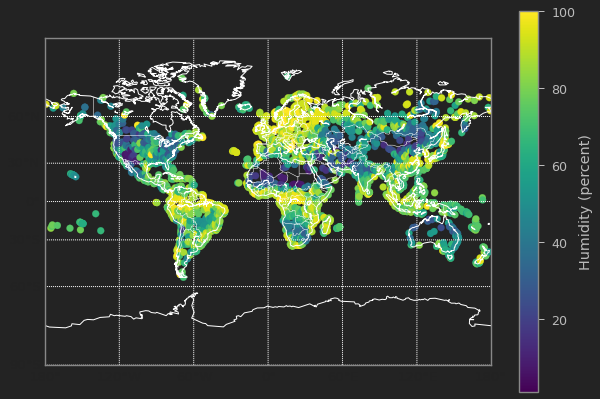

In [32]:
# Create a heatmap of the original dataframe.  We are using here the Basemap library from the mpl_toolkits module.

plt.subplots(figsize=(10, 7))

map = Basemap(projection='mill',lon_0=0)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines(color=linecolor)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color=linecolor)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1],color=linecolor)
map.drawcountries(color=linecolor)

map.scatter(clean_city_data['Longitude'], clean_city_data['Latitude'], latlon=True, 
            c=clean_city_data['Humidity'])

plt.colorbar(label=r'Humidity (percent)')

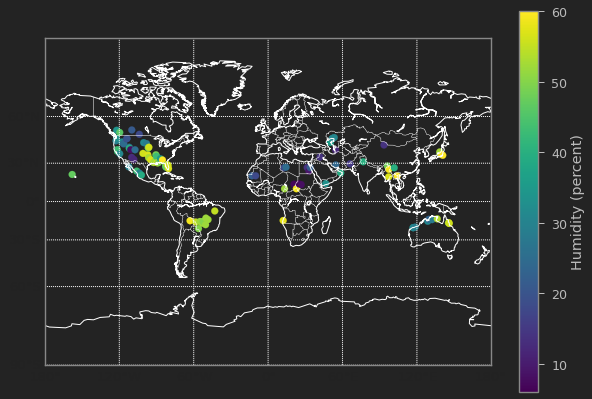

In [33]:
# create a heatmap of the parsed data
plt.subplots(figsize=(10, 7))

map = Basemap(projection='mill',lon_0=0)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines(color=linecolor)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color=linecolor)
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1],color=linecolor)
map.drawcountries(color=linecolor)

map.scatter(parsed_data['Longitude'], parsed_data['Latitude'], latlon=True, 
            c=parsed_data['Humidity'])

plt.colorbar(label=r'Humidity (percent)')

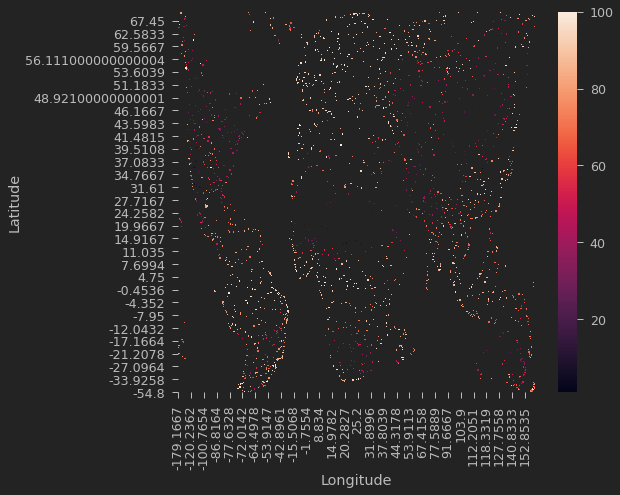

In [34]:
import seaborn as sns

cleaned_data_plotting = clean_city_data.pivot("Latitude", "Longitude", "Humidity")

ax = sns.heatmap(cleaned_data_plotting)
ax.invert_yaxis()

In [36]:
!jupyter nbextension enable --py gmaps
!jupyter nbextension enable --py widgetsnbextension
import gmaps
import gmaps.datasets

locations = parsed_data[['Latitude', 'Longitude']]
weights = parsed_data['Humidity']

fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: OK
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Figure(layout=FigureLayout(height='420px'))